<a href="https://colab.research.google.com/github/vishaln94/Digital-Advertising-Analytics/blob/master/Python_Exercise_2_Travel_Pony_Ad_cost_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df = pd.read_csv(csvfile)

In [0]:
import statsmodels.api as sm

Dropping the amounts that equal 0

In [0]:
df.drop(df[df['Amount Spent (USD)']==0].index, inplace = True)

Validating that the minimum amount is not 0

In [0]:
df['Amount Spent (USD)'].min()

0.09

Question 1

Creating scatterplots to analyze the relationship between Amount spent and multiple predictor variables.

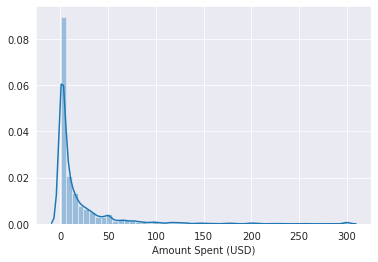

In [0]:
sns.set_style('darkgrid')
sns.distplot(df['Amount Spent (USD)'])

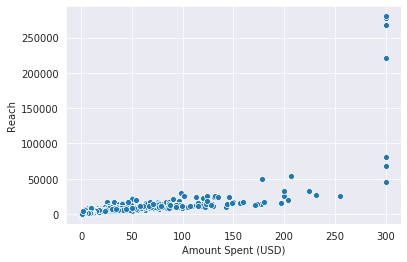

In [0]:
sns.scatterplot(x="Amount Spent (USD)", y="Reach", data=df)

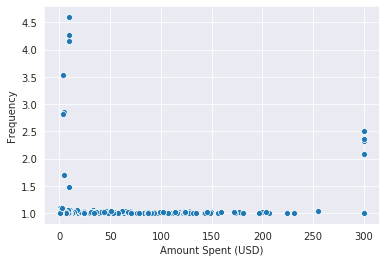

In [0]:
sns.scatterplot(x="Amount Spent (USD)", y="Frequency", data=df)

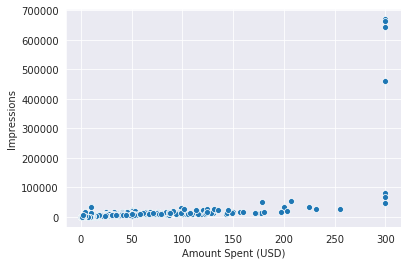

In [0]:
sns.scatterplot(x="Amount Spent (USD)", y="Impressions", data=df)

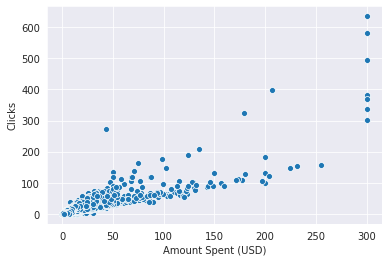

In [0]:
sns.scatterplot(x="Amount Spent (USD)", y="Clicks", data=df)

In [0]:
X = df["Amount Spent (USD)"] 
y = df["Clicks"]
X = sm.add_constant(X) 


model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Clicks   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     5614.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:49:22   Log-Likelihood:                -7943.8
No. Observations:                1802   AIC:                         1.589e+04
Df Residuals:                    1800   BIC:                         1.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1192      0.528      0.226      0.821      -0.915       1.154
Amount Spent (USD)     1.0115      0.014     74.926      0.000       0.985       1.038
==============================================================================
Omnibus:                     2153.638   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           570077.120
Skew:                           5.835   Prob(JB):                         0.00
Kurtosis:                      89.350   Cond. No.                         44.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the regression output, Amount spent is strongly correlated with clicks, with a high t value of 74.926

In [0]:
df2 = pd.get_dummies(df['Campaign Name'])

In [0]:
df = pd.concat([df,df2],axis=1)
df

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad 1,Cyber Weekend,Nanigans_2_637,Nanigans_2_638,Nanigans_2_639,Nanigans_2_640,Nanigans_2_641,Nanigans_2_642,Nanigans_2_643,Nanigans_2_644,Nanigans_2_645,Nanigans_2_646,Nanigans_2_647,Nanigans_2_648,Nanigans_2_651,Nanigans_2_652,Nanigans_2_653,Nanigans_2_654,Nanigans_2_655,Nanigans_2_656,...,Simple_Multi_Fill_Campaign_2_558,Simple_Multi_Fill_Campaign_2_559,Simple_Multi_Fill_Campaign_2_560,Simple_Multi_Fill_Campaign_2_561,Simple_Multi_Fill_Campaign_2_562,Simple_Multi_Fill_Campaign_2_563,Simple_Multi_Fill_Campaign_2_564,Simple_Multi_Fill_Campaign_2_565,Simple_Multi_Fill_Campaign_2_566,Simple_Multi_Fill_Campaign_2_567,Simple_Multi_Fill_Campaign_2_568,Simple_Multi_Fill_Campaign_2_569,Simple_Multi_Fill_Campaign_2_575,Simple_Multi_Fill_Campaign_2_579,Simple_Multi_Fill_Campaign_2_583,Simple_Multi_Fill_Campaign_2_596,Simple_Multi_Fill_Campaign_2_597,Simple_Multi_Fill_Campaign_2_598,Simple_Multi_Fill_Campaign_2_599,Simple_Multi_Fill_Campaign_2_600,Simple_Multi_Fill_Campaign_2_601,Simple_Multi_Fill_Campaign_2_602,Simple_Multi_Fill_Campaign_2_603,Simple_Multi_Fill_Campaign_2_617,Simple_Multi_Fill_Campaign_2_619,Simple_Multi_Fill_Campaign_2_620,Simple_Multi_Fill_Campaign_2_621,Simple_Multi_Fill_Campaign_2_622,Simple_Multi_Fill_Campaign_2_623,Simple_Multi_Fill_Campaign_2_624,Simple_Multi_Fill_Campaign_2_626,Simple_Multi_Fill_Campaign_2_627,Simple_Multi_Fill_Campaign_2_631,Simple_Multi_Fill_Campaign_2_633,Simple_Multi_Fill_Campaign_2_634,Simple_Multi_Fill_Campaign_2_636,TravelPony: Conversion Test,TravelPony: General Ads,Travelpony-Page Likes-US-13-65,http://travelpony...-Clicks-US-13-65
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.00,0.990000

Question 2

In [0]:
a = df.iloc[:,4:]
del a['Amount Spent (USD)']
del a['Cost per Page Engagement (USD)']
del a['Cost per Page Like (USD)']

In [0]:
a

,Reach,Frequency,Impressions,Clicks,Unique Clicks,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Ad 1,Cyber Weekend,Nanigans_2_637,Nanigans_2_638,Nanigans_2_639,Nanigans_2_640,Nanigans_2_641,Nanigans_2_642,Nanigans_2_643,Nanigans_2_644,Nanigans_2_645,Nanigans_2_646,Nanigans_2_647,Nanigans_2_648,Nanigans_2_651,Nanigans_2_652,Nanigans_2_653,Nanigans_2_654,Nanigans_2_655,Nanigans_2_656,Nanigans_2_659,Nanigans_2_660,Nanigans_2_661,Nanigans_2_662,Nanigans_2_663,Nanigans_2_664,Nanigans_2_669,...,Simple_Multi_Fill_Campaign_2_558,Simple_Multi_Fill_Campaign_2_559,Simple_Multi_Fill_Campaign_2_560,Simple_Multi_Fill_Campaign_2_561,Simple_Multi_Fill_Campaign_2_562,Simple_Multi_Fill_Campaign_2_563,Simple_Multi_Fill_Campaign_2_564,Simple_Multi_Fill_Campaign_2_565,Simple_Multi_Fill_Campaign_2_566,Simple_Multi_Fill_Campaign_2_567,Simple_Multi_Fill_Campaign_2_568,Simple_Multi_Fill_Campaign_2_569,Simple_Multi_Fill_Campaign_2_575,Simple_Multi_Fill_Campaign_2_579,Simple_Multi_Fill_Campaign_2_583,Simple_Multi_Fill_Campaign_2_596,Simple_Multi_Fill_Campaign_2_597,Simple_Multi_Fill_Campaign_2_598,Simple_Multi_Fill_Campaign_2_599,Simple_Multi_Fill_Campaign_2_600,Simple_Multi_Fill_Campaign_2_601,Simple_Multi_Fill_Campaign_2_602,Simple_Multi_Fill_Campaign_2_603,Simple_Multi_Fill_Campaign_2_617,Simple_Multi_Fill_Campaign_2_619,Simple_Multi_Fill_Campaign_2_620,Simple_Multi_Fill_Campaign_2_621,Simple_Multi_Fill_Campaign_2_622,Simple_Multi_Fill_Campaign_2_623,Simple_Multi_Fill_Campaign_2_624,Simple_Multi_Fill_Campaign_2_626,Simple_Multi_Fill_Campaign_2_627,Simple_Multi_Fill_Campaign_2_631,Simple_Multi_Fill_Campaign_2_633,Simple_Multi_Fill_Campaign_2_634,Simple_Multi_Fill_Campaign_2_636,TravelPony: Conversion Test,TravelPony: General Ads,Travelpony-Page Likes-US-13-65,http://travelpony...-Clicks-US-13-65
0,278117,2.314303,643647,336,313,3,246,243,0,0,0,0,243,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,221255,2.079090,460009,376,348,6,215,209,0,0,0,0,209,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,267915,2.499069,669538,383,345,2,252,250,0,0,0,0,250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,280332,2.365406,663099,301,275,3,257,254,0,0,0,0,254,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14269,1.000420,14275,64,61,2,14,12,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,298,1.003356,299,2,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3701,514,1.060311,545,3,3,0,3,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3702,111,1.000000,111,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3703,143,1.000000,143,3,3,0,3,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
b = df['Amount Spent (USD)']
b

0       300.00
1       300.00
2       300.00
3       300.00
4        35.18
         ...  
3700      1.05
3701      1.60
3702      0.99
3703      0.95
3704      2.25
Name: Amount Spent (USD), Length: 1802, dtype: float64

In [0]:
#Output is Amount Spent
#Input is all the other variables

#a = input (all the other variables)
#b = output (Amount spent)
model = sm.OLS(b,a).fit()
predictions = model.predict(a)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     78.55
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:51:16   Log-Likelihood:                -6125.9
No. Observations:                1802   AIC:                         1.304e+04
Df Residuals:                    1408   BIC:                         1.521e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Reach                                                           0.0030      0.000     16.921      0.000       0.003       0.003
Frequency                                                       7.6890      3.096      2.483      0.013       1.615      13.762
Impressions                                                    -0.0008   8.01e-05    -10.260      0.000      -0.001      -0.001
Clicks                                                         -0.2388      0.109     -2.185      0.029      -0.453      -0.024
Unique Clicks                                                   0.4621      0.121      3.806      0.000       0.224       0.700
Page Likes                                                     16.3728      8.450      1.938      0.053      -0.203      32.949
Page Engagement                                               -14.0592      8.445     -1.665      0.096     -30.626       2.508
Post Engagement                                                11.9816      7.040      1.702      0.089      -1.827      25.791
Post Likes                                                      1.8197      1.413      1.288      0.198      -0.952       4.591
Post Comments                                                   2.7753      1.479      1.877      0.061      -0.125       5.676
Post Shares                                                     2.5140      1.445      1.740      0.082      -0.321       5.349
Photo Views                                                     2.2671      1.410      1.608      0.108      -0.499       5.034
Website Clicks                                                  2.6055      1.410      1.848      0.065      -0.160       5.371
Ad 1                                                           -8.6574      4.304     -2.012      0.044     -17.099      -0.215
Cyber Weekend                                                -208.1785     25.716     -8.095      0.000    -258.624    -157.733
Nanigans_2_637                                                 -6.8641      5.700     -1.204      0.229     -18.046       4.318
Nanigans_2_638                                                 -6.0111      5.674     -1.059      0.290     -17.142       5.119
Nanigans_2_639                                                 -7.4490      5.669     -1.314      0.189     -18.569       3.671
Nanigans_2_640                                                -10.0477      5.161     -1.947      0.052     -20.172       0.077
Nanigans_2_641                                                 -9.8138      5.681     -1.728      0.084     -20.957       1.330
Nanigans_2_642                                                 -9.1921      5.693     -1.615      0.107     -20.360       1.976
Nanigans_2_

Based on the regression output above, the 3 strongest predictors are: Cyber weekend, Travel Pony: Conversion Test, and Travel Pony: General Ads.
